<a href="https://colab.research.google.com/github/Azimoj/Customer-Segmentation/blob/main/POLIST_02_notebookessais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marketing Analytics - RFM Customer Segmentation with K Means

RFM features of customers:

    The more recent they purchase, the more responsive they are to the promotions.
    The more frequent they purchase, the more engaged and satisfied they are.
    The more monetary value helps to differentiate high spenders vs low spenders.



In [ ]:
import pandas as pd
%pylab inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\Drive/p5
!ls

df = pd.read_csv(
    '/content/drive/MyDrive/p5/data_feature_eng.csv')

/content/drive/MyDrive/p5
data_feature_eng.csv		  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  p5
olist_order_reviews_dataset.csv   POLIST_02_notebookessais.ipynb
olist_orders_dataset.csv	  product_category_name_translation.csv
olist_products_dataset.csv


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,zip_code_prefix_customer,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_item_id,seller_id,shipping_limit_date,price,freight_value,zip_code_prefix_seller,seller_city,seller_state,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,product_category_name,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,-17.851690,-41.493610,teofilo otoni,MG,af74cc53dcffc8384b29e7abfa41902b,57.0,921.0,8.0,800.0,17.0,27.0,17.0,1,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,13321,salto,SP,-23.190244,-47.291571,salto,SP,home_construction,2018,4,Apr,201804,20180425,25,2,Wed,22,Night
1,b545ba7b0bd67a3128185c7214704319,1,credit_card,8,340.08,7e2ca73af071679902a9ba14d7c3cee8,delivered,2018-06-11 14:59:24,2018-06-11 16:31:42,2018-06-12 14:15:00,2018-06-18 16:41:04,2018-07-04 00:00:00,5f65ad4b5147b940da2da6802f18bbf7,4,NaN,NaN,2018-06-19 00:00:00,2018-06-19 20:20:45,55020cb68ae358a51969695657a54e9c,15520,valentim gentil,SP,-20.421158,-50.086044,valentim gentil,SP,2233b59e8cf2817f9659e52cce3093de,58.0,1624.0,3.0,9350.0,20.0,20.0,20.0,1,e3d3b3efac954a60d61be70b7e05b49b,2018-06-15 15:20:20,316.05,24.03,3370,sao paulo,SP,-23.567995,-46.557625,sao paulo,SP,home_construction,2018,6,Jun,201806,20180611,11,0,Mon,14,Afternoon
2,6a26bd1a037993f1205073dbeda67db4,1,credit_card,2,67.12,2a44b3dbad360783fd663c15c3e6367c,delivered,2018-02-15 13:53:42,2018-02-15 14:10:28,2018-02-16 22:38:59,2018-03-02 22:29:04,2018-03-08 00:00:00,fad89f16742c04dcdfec38fd6c115561,4,NaN,"Otimo produto recebir no prazo certo,recomento",2018-03-03 00:00:00,2018-03-04 20:25:59,aca152a8bcfa7d7059b7787c67d60d52,13295,itupeva,SP,-23.159152,-47.058208,itupeva,SP,679a3e5e1d2bb68982be5734c6e55e63,57.0,565.0,4.0,800.0,38.0,38.0,22.0,1,8a130737016f838139d31878787a39c9,2018-02-21 13:10:28,54.40,12.72,3187,sao paulo,SP,-23.566231,-46.580203,sao paulo,SP,home_construction,2018,2,Feb,201802,20180215,15,3,Thu,13,Afternoon
3,1fce50c1831b6809773e5020edc716e2,1,credit_card,2,36.16,1ddcc619647ca008fdc24f8302c8573f,delivered,2018-07-24 20:08:54,2018-07-25 20:05:09,2018-07-26 16:04:00,2018-07-30 17:20:59,2018-08-07 00:00:00,bc0fa803dc47267d440652c24692784d,3,NaN,NaN,2018-07-31 00:00:00,2018-08-01 09:12:07,9aa679326b151fc564c2a238f361aa7d,5678,sao paulo,SP,-23.597505,-46.704756,sao paulo,SP,cce794ab6b84d0345332bb1910f9eb20,60.0,843.0,1.0,275.0,20.0,11.0,19.0,1,165b1235e9e9942cb5fae67103576fb0,2018-07-31 20:05:09,21.70,14.46,14020,ribeirao preto,SP,-21.210105,-47.801390,ribeirao preto,SP,home_construction,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
4,107f069fdb62a9cbe252b043323e4e32,1,credit_card,2,175.13,ef0ce737cbf4c0d6aefb7c7281b658e3,delivered,2018-05-18 08:24:28,2018-05-18 08:55:36,2018-05-24 09:45:00,2018-06-12 18:18:45,2018-06-07 00:00:00,4d18eb591789b7687cf69ad6d6d4485c,5,Não recebi,Nã

In [ ]:
features = ['order_id', 'order_status', 'order_purchase_timestamp',
       'payment_value', 'customer_unique_id', 'zip_code_prefix_customer','order_item_id',
       'customer_city', 'customer_state','order_purchase_date','order_delivered_customer_date','price','freight_value']
dff = df[features]
dff.shape

(116581, 13)

In [ ]:
Olist_db= dff.copy()

In [ ]:
Olist_db.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
payment_value                       0
customer_unique_id                  0
zip_code_prefix_customer            0
order_item_id                       0
customer_city                       0
customer_state                      0
order_purchase_date                 0
order_delivered_customer_date    2515
price                               0
freight_value                       0
dtype: int64

In [ ]:
Olist_db.dropna(inplace=True)

In [ ]:
Olist_db.describe()

,payment_value,zip_code_prefix_customer,order_item_id,order_purchase_date,price,freight_value
count,114066.000000,114066.000000,114066.000000,1.140660e+05,114066.000000,114066.000000
mean,172.135500,35081.680133,1.197500,2.017603e+07,120.008792,20.010184
std,266.139258,29849.608164,0.703142,4.870590e+03,182.426455,15.726425
min,0.000000,1003.000000,1.000000,2.016100e+07,0.850000,0.000000
25%,60.960000,11310.000000,1.000000,2.017091e+07,39.900000,13.080000
50%,108.065000,24320.000000,1.000000,2.018012e+07,74.900000,16.320000
75%,189.370000,58801.750000,1.000000,2.018050e+07,133.000000,21.190000
max,13664.080000,99980.000000,21.000000,2.018083e+07,6735.000000,409.680000


In [ ]:
cond = Olist_db["order_status"] == "delivered"
Olist_db = Olist_db.loc[cond]

In [ ]:
out= Olist_db[Olist_db['payment_value']>= 3000]
out

In [ ]:
Olist_db=Olist_db[Olist_db['payment_value']<= 3000]

## Feature Engineering

In [ ]:
#le prix qu'un client paye lors de sa commande 
Olist_db['Total_puchase']=(Olist_db['price']*Olist_db['order_item_id'])+(Olist_db['freight_value']*Olist_db['order_item_id'])
#le prix de la livraison que le client paye 
Olist_db['Delivery_price']=(Olist_db['freight_value']*Olist_db['order_item_id'])
#le prix que le client paye avec  le nombre de produits quil a commande 
Olist_db['product_price']=(Olist_db['price']*Olist_db['order_item_id'])

Text(0.5, 1.0, 'product_price')

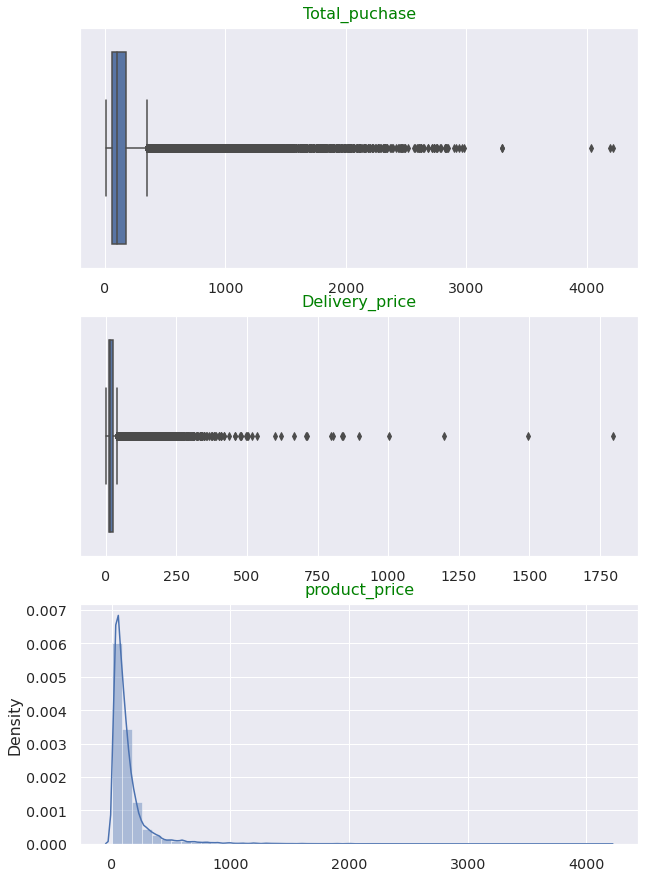

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,15))
# Plot of Total_puchase
plt.subplot(3, 1, 1)
sns.boxplot(Olist_db['Total_puchase'])
plt.xlabel("")
plt.title('Total_puchase', size=16, color='green', pad=10)

# Plot of Delivery_price
plt.subplot(3, 1, 2)
sns.boxplot(Olist_db['Delivery_price'])
plt.xlabel("")
plt.title('Delivery_price', size=16, color='green', pad=10)

# Plot of product_price
plt.subplot(3, 1, 3)
sns.distplot(Olist_db['product_price'])
plt.xlabel("")
plt.title('product_price', size=16, color='green', pad=10)

### **To calculate RFM**

In [ ]:
import datetime as dt

In [ ]:
# Make the date_placed column datetime
Olist_db['order_purchase_timestamp'] = pd.to_datetime(Olist_db['order_purchase_timestamp'])

In [ ]:
Olist_db['order_purchase_date'].max()

20180829

In [ ]:
NOW = dt.datetime(2018,8,30)

rfmTable = Olist_db.groupby('customer_unique_id').agg({'order_purchase_timestamp': lambda x: ((NOW - x.max()).days)+1 , # Recency
                                        'order_id': lambda x: len(x),      # Frequency
                                        'Total_puchase': lambda x: x.sum()}).reset_index() # Monetary Value

rfmTable['order_purchase_timestamp'] = rfmTable['order_purchase_timestamp'].astype(int)
rfmTable.rename(columns={'order_purchase_timestamp': 'Recency', 
                         'order_id': 'Frequency', 
                         'Total_puchase': 'Monetary'}, inplace=True)

In [ ]:
frequence=data.groupby('customer_unique_id')['order_purchase_timestamp'].count().reset_index()

Text(0.5, 1.0, 'Monetary')

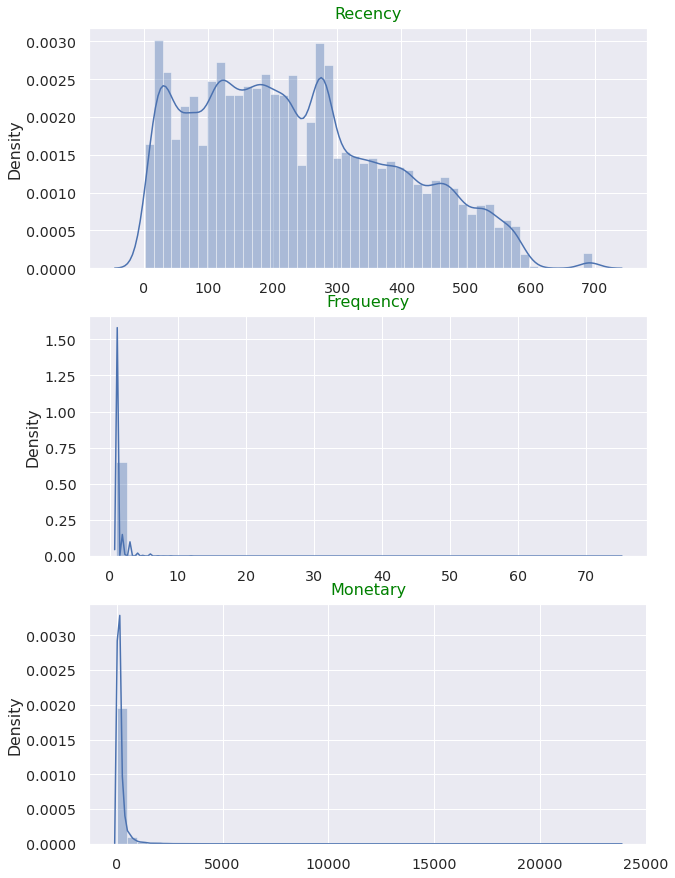

In [ ]:
sns.set(font_scale=1.3)
plt.figure(figsize=(10,15))
# Plot distribution of Recency
plt.subplot(3, 1, 1)
sns.distplot(rfmTable['Recency'])
plt.xlabel("")
plt.title('Recency', size=16, color='green', pad=10)

# Plot distribution of Frequency
plt.subplot(3, 1, 2)
sns.distplot(rfmTable['Frequency'])
plt.xlabel("")
plt.title('Frequency', size=16, color='green', pad=10)

# Plot distribution of Monetary
plt.subplot(3, 1, 3)
sns.distplot(rfmTable['Monetary'])
plt.xlabel("")
plt.title('Monetary', size=16, color='green', pad=10)

Text(0.5, 1.0, 'Monetary')

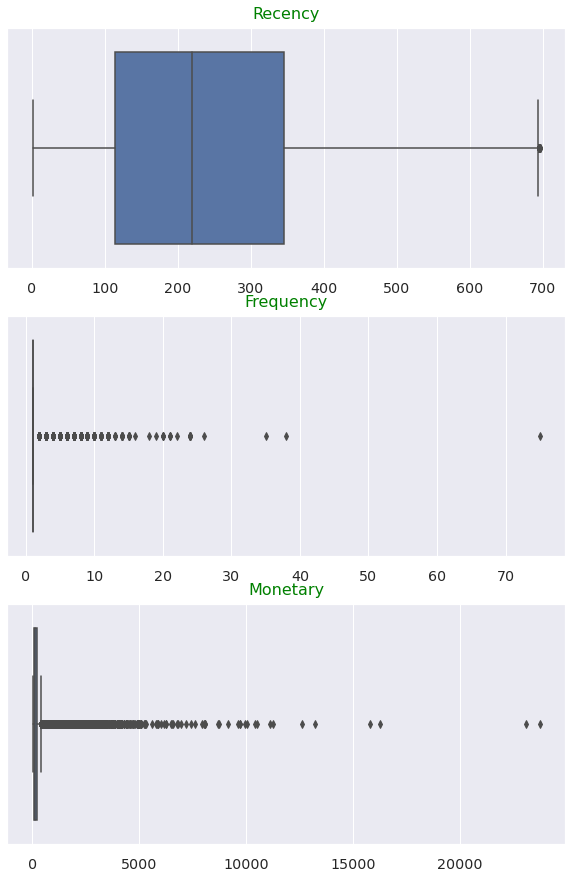

In [ ]:
plt.figure(figsize=(10,15))
# Plot of Recency
plt.subplot(3, 1, 1)
sns.boxplot(rfmTable['Recency'])
plt.xlabel("")
plt.title('Recency', size=16, color='green', pad=10)

# Plot of Frequency
plt.subplot(3, 1, 2)
sns.boxplot(rfmTable['Frequency'])
plt.xlabel("")
plt.title('Frequency', size=16, color='green', pad=10)

# Plot of Monetary
plt.subplot(3, 1, 3)
sns.boxplot(rfmTable['Monetary'])
plt.xlabel("")
plt.title('Monetary', size=16, color='green', pad=10)

### **Determining RFM Quartiles**

In [ ]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])

In [ ]:
quantiles

,Recency,Frequency,Monetary
0.25,114.0,1.0,64.51
0.50,219.0,1.0,113.77
0.75,346.0,1.0,200.88


Creating the RFM segmentation table

In [ ]:
rfmSegmentation = rfmTable

In [ ]:
# Arguments (x = value, p = recency, monetary, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
rfmSegmentation['R_Quartile'] = rfmSegmentation['Recency'].apply(RClass, args=('Recency',quantiles,))
rfmSegmentation['F_Quartile'] = rfmSegmentation['Frequency'].apply(FMClass, args=('Frequency',quantiles,))
rfmSegmentation['M_Quartile'] = rfmSegmentation['Monetary'].apply(FMClass, args=('Monetary',quantiles,))

In [ ]:
rfmSegmentation['RFMClass'] = rfmSegmentation.R_Quartile.map(str) \
                            + rfmSegmentation.F_Quartile.map(str) \
                            + rfmSegmentation.M_Quartile.map(str)

In [ ]:
rfmSegmentation.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,4,2,142
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,2,4,4,244
2,0000f46a3911fa3c0805444483337064,538,1,86.22,4,4,3,443
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,4,4,344
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,4,2,342


In [ ]:
# Count num of unique segments
rfm_count_unique = rfmSegmentation.groupby('RFMClass')['RFMClass'].nunique()
print(rfm_count_unique.sum())

32


In [ ]:
rfmSegmentation['RFM_Score'] = rfmSegmentation[['R_Quartile','F_Quartile','M_Quartile']].sum(axis=1)
rfmSegmentation.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,4,2,142,7
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,2,4,4,244,10
2,0000f46a3911fa3c0805444483337064,538,1,86.22,4,4,3,443,11
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,4,4,344,11
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,4,2,342,9


to select groups of customers to whom specific types of communications will be sent, based on the RFM segments in which they appear.

It is helpful to assign names to segments of interest. Here are just a few examples to illustrate:

 *  **Best Customers** – This group consists of those customers who are found in R-Tier-1, F-Tier-1 and M-Tier-1, meaning that they transacted recently, do so often and spend more than other customers. A shortened notation for this segment is 1-1-1; we’ll use this notation going forward.

*   **Regular Customers** – This group consists of those customers in 2-3-1 and 3-4-2. These are customers who are not in other groups.

*   **Loyal Customers** – This group consists of those customers in segments 1-1-3 and 1-1-4 (they transacted recently and do so often, but spend the least).

*   **Churned Best Customers** – This segment consists of those customers in groups 4-1-1, 4-1-2, 4-2-1 and 4-2-2 (they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted).

*  **Lost customers** –The customers who were not spending so much and were absent for a long time 4-4-4, 4-3-4.

Marketers should assemble groups of customers most relevant for their particular business objectives and retention goals.


In [ ]:
# Define rfm_level function 
def rfm_level(df):
    if (df['M_Quartile'] == 1) & (df['RFM_Score'] <= 4):
        return 'Best Customers' 
    
    elif (((df['R_Quartile'] == 1) & (df['RFM_Score'] >= 5))| (df['RFMClass'] == 121)):
        return 'Loyal Customers'
    
    elif ((df['RFM_Score'] <= 8) & (df['R_Quartile'] == 4)| (df['RFM_Score'] <= 6) & (df['R_Quartile'] == 3)):
        return 'Churned Best Customers'
    
    elif ((df['M_Quartile'] == 4) & (df['R_Quartile'] == 4) & (df['RFM_Score'] >= 11)):
        return 'Lost Customers'
    
    else:
        return 'Regular Customers'

In [ ]:
# Define rfm marketing action function
def rfm_action(df):
    if (df['M_Quartile'] == 1) & (df['RFM_Score'] <= 4):
        return 'Upsell most expensive items'
    
    elif (((df['R_Quartile'] == 1) & (df['RFM_Score'] >= 5))| (df['RFMClass'] == 121)):
        return 'Loyality programs;Cross Sell'
    
    elif ((df['RFM_Score'] <= 8) & (df['R_Quartile'] == 4)| (df['RFM_Score'] <= 6) & (df['R_Quartile'] == 3)):
        return 'Cross Sell Recommendations and Discount coupons'
    
    elif ((df['M_Quartile'] == 4) & (df['R_Quartile'] == 4) & (df['RFM_Score'] >= 9)):
        return 'Don\'t spend too much trying to re-acquire'
    
    else:
        return 'Price incentives and Limited time offer'

In [ ]:
# Create a new variable RFM_Level
rfmSegmentation['RFMClass'] = rfmSegmentation.RFMClass.apply(lambda x: int(x))
rfmSegmentation['Customer Segment'] = rfmSegmentation.apply(rfm_level, axis=1)

# Create a new variable RFM_Level
rfmSegmentation['Marketing Action'] = rfmSegmentation.apply(rfm_action, axis=1)
rfmSegmentation.head()

,customer_unique_id,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass,RFM_Score,Customer Segment,Marketing Action
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,141.90,1,4,2,142,7,Loyal Customers,Loyality programs;Cross Sell
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,27.19,2,4,4,244,10,Regular Customers,Price incentives and Limited time offer
2,0000f46a3911fa3c0805444483337064,538,1,86.22,4,4,3,443,11,Regular Customers,Price incentives and Limited time offer
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62,3,4,4,344,11,Regular Customers,Price incentives and Limited time offer
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89,3,4,2,342,9,Regular Customers,Price incentives and Limited time offer


In [ ]:
rfmSegmentation.shape

(92033, 11)

In [ ]:
rfmSegmentation['Customer Segment'].value_counts()

Regular Customers         55269
Loyal Customers           20027
Churned Best Customers     6470
Lost Customers             5704
Best Customers             4563
Name: Customer Segment, dtype: int64

### Group Customer by their Customer Segment

In [ ]:
#Calculate Average values for each customer segment and return size of each segment
rfm_level_agg = rfmSegmentation.groupby(['Customer Segment']).agg({'Recency': 'mean',
                                                                   'Frequency' : 'mean',
                                                                   'Monetary': ['mean', 'count'],
                                                                   'Marketing Action' : 'unique'}).round(1)
#print the aggregated dataset
rfm_level_agg

Recency Frequency Monetary         \
                          mean      mean     mean  count   
Customer Segment                                           
Best Customers           114.9       2.8    612.8   4563   
Churned Best Customers   368.7       2.6    470.3   6470   
Lost Customers           454.6       1.0     44.2   5704   
Loyal Customers           57.2       1.0    150.8  20027   
Regular Customers        275.7       1.0    159.0  55269   

                                                         Marketing Action  
                                                                   unique  
Customer Segment                                                           
Best Customers                              [Upsell most expensive items]  
Churned Best Customers  [Cross Sell Recommendations and Discount coupons]  
Lost Customers                [Don't spend too much trying to re-acquire]  
Loyal Customers                            [Loyality programs;Cross Sell]  
Regular Customers       [Price incentives and Limited time offer, Don'...

In [ ]:
!pip install squarify

(0.0, 100.0, 0.0, 100.0)

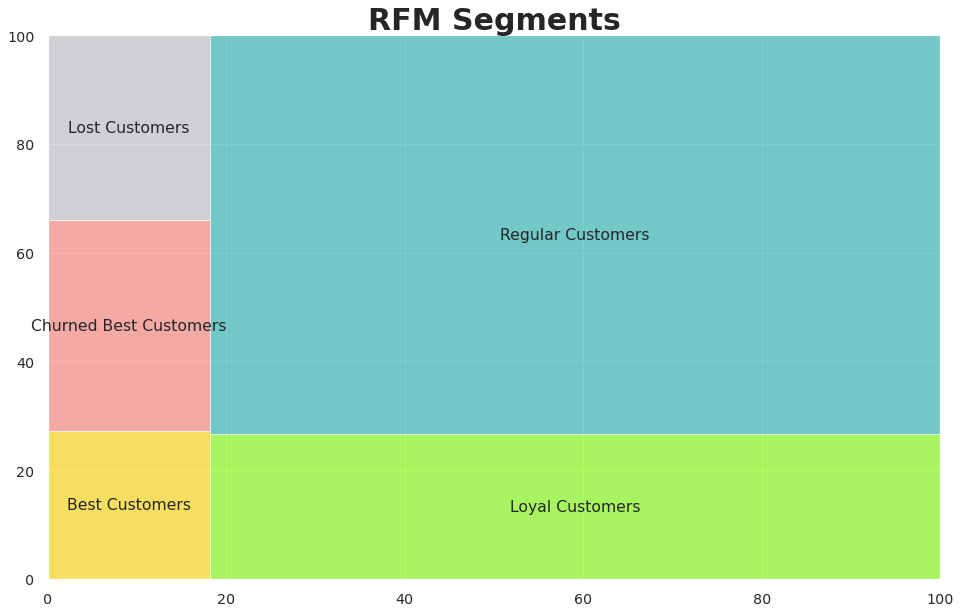

In [ ]:
import squarify
sns.set(font_scale=1.3)
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count', 'MarketingAction']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
color = ['gold', 'salmon', 'silver', 'lawngreen', 'lightseagreen']
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Best Customers',
                     'Churned Best Customers',
                     'Lost Customers',
                     'Loyal Customers',
                     'Regular Customers',], alpha=.6,color=color)
plt.title("RFM Segments",fontsize=30,fontweight="bold")
plt.axis('on')



 *  **Best Customers** - It’s important to make them feel valued and appreciated – and to give them terrific incentives to continue interacting with the brand.

 *  **Churned Best Customers** — Showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let's target them with their wishlist items and a limited time offer discount.

*   **Lost Customers** — Made some initial purchases but have not seen them since. Was it a bad customer experience? Or product-market fit?

*  **Loyal Customers** — These are the most loyal customers. They are active with frequent purchases and high monetary value. They could be the brand evangelists and should focus on serving them well. They could be the best customers to get feedback on any new product launches or be the early adopters or promoters.

*   **Regular Customers** — High potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!



## **Normalization**

In [ ]:
rfm_df= rfmTable[['Recency', 'Frequency', 'Monetary']]

In [ ]:
from sklearn.preprocessing import StandardScaler

data_log = np.log(rfm_df)
scaler = StandardScaler()
scaler.fit(data_log)
data_normalized = scaler.transform(data_log)
data_normalized = pd.DataFrame(data=data_normalized, index=rfm_df.index, columns=rfm_df.columns)

In [ ]:
data_normalized.head()

,Recency,Frequency,Monetary
0,-0.465187,-0.387512,0.183912
1,-0.437149,-0.387512,-1.690399
2,1.199476,-0.387512,-0.381261
3,0.654997,-0.387512,-1.154214
4,0.540306,-0.387512,0.555448


### **K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
#from sklearn import metrics, cluster
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.datasets import make_blobs

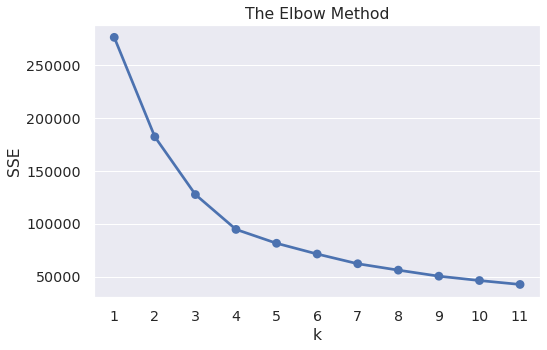

In [ ]:
from sklearn.cluster import KMeans
sns.set(font_scale=1.3)
sse = {}
for k in range(1, 12):  
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_
plt.figure(figsize=(8,5))

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))

In [ ]:
kmeans = KMeans(n_clusters = 4, random_state=1)
kmeans.fit(data_normalized)
cluster_labels = kmeans.labels_
rfm_k5 = rfm_df.assign(Cluster=cluster_labels)
grouped = rfm_k5.groupby(['Cluster'])
grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
  }).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0         275.8       1.0    267.6  28280
1         284.5       1.0     63.7  35896
2         249.0       2.6    461.5  13165
3          40.7       1.0    134.2  14692

### **Evaluation clustering algorithms**

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.datasets import make_blobs

**1.K-Elbow Plot**

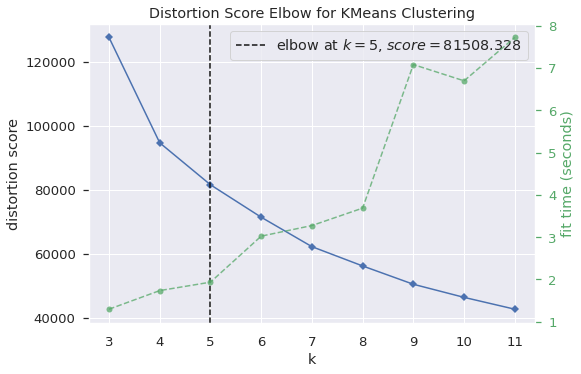

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(data_normalized)   
visualizer.poof()

**2.Calinski harabasz plot**

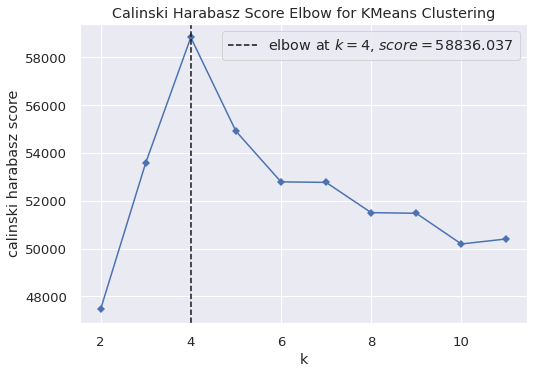

In [ ]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False)

visualizer.fit(data_normalized)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

**3.Silhouette Visualizer**

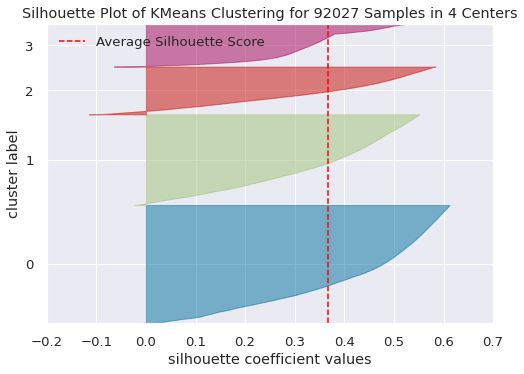

In [ ]:
model = KMeans(4)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_normalized)   
visualizer.poof()

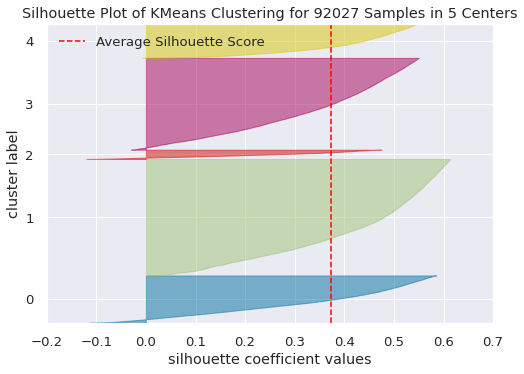

In [ ]:
model = KMeans(5)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(data_normalized)   
visualizer.poof()

## TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne_model =TSNE(n_components=2,perplexity=50, random_state= 0)
X_tsne= tsne_model.fit_transform(data_normalized)

In [ ]:
my_clust = KMeans(n_clusters=5, random_state=1)
my_clust.fit(data_normalized)
dataModel5 = rfm_df.assign(Cluster=my_clust.labels_)

Text(0.5, 1.0, 'Clusters with TSNE projection')

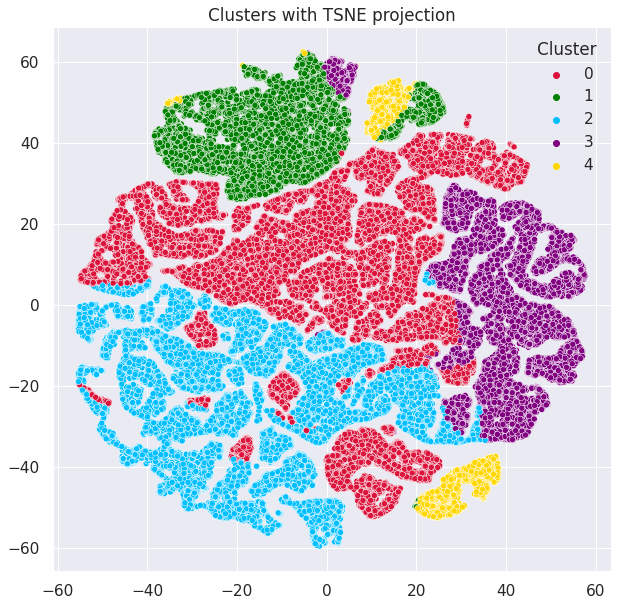

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue='Cluster',data=dataModel5,\
                palette=['crimson','green','deepskyblue','purple','gold'])
plt.title('Clusters with TSNE projection')

In [ ]:
my_clust = KMeans(n_clusters=4, random_state=1)
my_clust.fit(data_normalized)
dataModel4 = rfm_df.assign(Cluster=my_clust.labels_)

Text(0.5, 1.0, 'Clusters with TSNE projection')

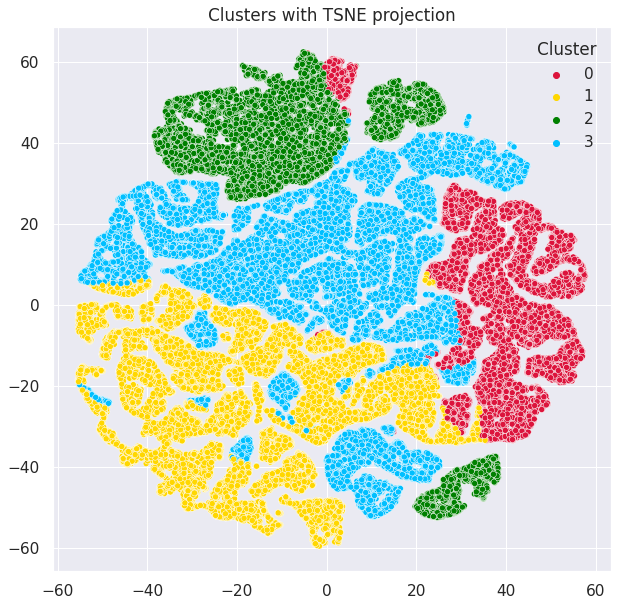

In [ ]:
sns.set(font_scale=1.4)
plt.figure(figsize=(10,10))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1],hue='Cluster',data=dataModel4,\
                palette=['crimson','gold','green','deepskyblue'])
plt.title('Clusters with TSNE projection')

In [ ]:
dataModel4.groupby('Cluster')[['Recency','Frequency','Monetary']].mean().round(1)

,Recency,Frequency,Monetary
Cluster,,,
0,40.5,1.0,134.0
1,274.9,1.0,268.1
2,248.9,2.6,461.5
3,284.9,1.0,63.9


In [ ]:
dataModel4['Cluster'].value_counts()

In [ ]:
df=pd.DataFrame({'Cluster':dataModel4['Cluster'].value_counts().index,'NumberOfCustomers':dataModel4['Cluster'].value_counts().values})

Text(0.5, 1.0, 'The number of customers in each cluster')

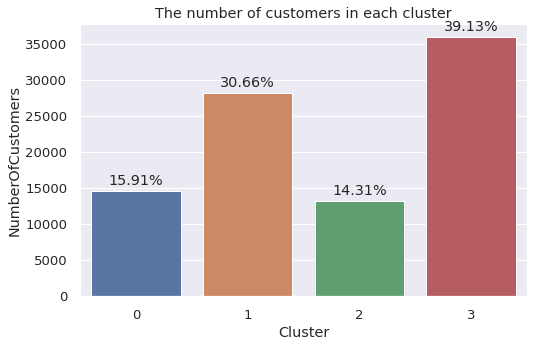

In [ ]:
sns.set(font_scale=1.2)
fig = plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Cluster',y='NumberOfCustomers',data=df.sort_values('Cluster',ascending=False))
total = sum(df['NumberOfCustomers'])

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('The number of customers in each cluster')

## **DBSCAN**

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
db = DBSCAN(eps=0.3).fit(data_normalized)

In [ ]:
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

In [ ]:
print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 21
Estimated no. of noise points: 445


## **ARI**

In [ ]:
from sklearn import metrics
df = pd.DataFrame()
my_clust4 = KMeans(n_clusters=4, random_state=1)
my_clust4.fit(data_normalized)

for i in range(200):
    test = KMeans(n_clusters=4)
    test.fit_predict(data_normalized)
    ari = metrics.adjusted_rand_score(my_clust4.labels_, test.labels_)
    test = pd.DataFrame(test.cluster_centers_)
    test.columns = ['RecencyCor', 'FrequenceCor', 'MonetaryCor']
    test['Indice'] = i
    test['ARI'] = ari
    # Calcul du rand score qui doit etre proche de 1
    # car ils sont choisis aleatoirement
    df = pd.concat([df, test])

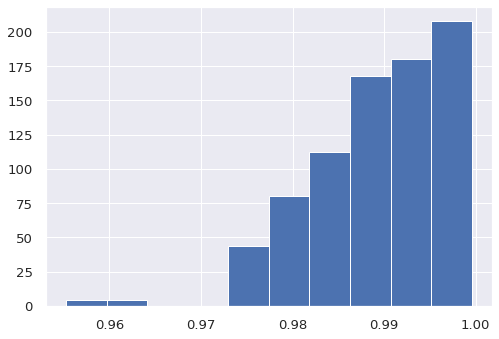

In [ ]:
df['ARI'].hist()   

In [ ]:
dataEtude=Olist_db.copy()

In [ ]:
dataEtude['order_purchase_timestamp']=pd.to_datetime(dataEtude['order_purchase_timestamp'])

In [ ]:
dataEtude['year']=dataEtude['order_purchase_timestamp'].dt.year

In [ ]:
dataEtude['Date']=dataEtude['order_purchase_timestamp'].dt.strftime( "%Y-%m-%d")

In [ ]:
dataEtude['Date']=pd.to_datetime(dataEtude['Date'])

In [ ]:
dataEtude['Month_year']=dataEtude['order_purchase_timestamp'].dt.strftime( "%B-%Y")


In [ ]:
data=pd.merge(dataEtude,rfmTable,on='customer_unique_id')

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import metrics

In [ ]:
i = (data['Month_year'] == 'June-2017') ^ (data['Month_year'] == 'July-2017')
jun_jul17 = data[i]
features = ['Recency', 'Frequency', 'Monetary']
index = jun_jul17.columns.isin(features)
dataModel_jun_jul17 = jun_jul17[jun_jul17.columns[index]]
# Standarisation
x_jun_jul17 = dataModel_jun_jul17.values
X_scaled_jun_jul17 = StandardScaler().fit_transform(x_jun_jul17)
# modele
model_jun_jul17 = KMeans(n_clusters=4)
model_jun_jul17.fit(X_scaled_jun_jul17)
# pred
pred_jun_jul17 = KMeans(n_clusters=4)
pred_jun_jul17.fit_predict(X_scaled_jun_jul17)
ARS_jun_jul17 = adjusted_rand_score(model_jun_jul17.labels_, pred_jun_jul17.labels_)

In [ ]:
i = (data['Month_year'] == 'September-2017') ^ (data['Month_year'] == 'August-2017')
    
aug17_sep17 = data[i]
jun_sep17 = pd.merge(jun_jul17, aug17_sep17, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun_sep17.columns.isin(features)
dataModel_jun_sep17 = jun_sep17[jun_sep17.columns[index]]
# Standarisation
x_jun_sep17= dataModel_jun_sep17.values
X_scaled_jun_sep17 = StandardScaler().fit_transform(x_jun_sep17)
# modele
model_jun_sep17 = KMeans(n_clusters=4)
model_jun_sep17.fit(X_scaled_jun_sep17)
# pred
pred_jun_sep17 = KMeans(n_clusters=4)
pred_jun_sep17.fit_predict(X_scaled_jun_sep17)
ARS_jun_sep17 = adjusted_rand_score(model_jun_sep17.labels_, pred_jun_sep17.labels_)

In [ ]:
i = (data['Month_year'] == 'October-2017') ^ (data['Month_year'] == 'November-2017')
    
oct17_nov17 = data[i]
jun_nov17 = pd.merge(jun_jul17, oct17_nov17, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun_nov17.columns.isin(features)
dataModel_jun_nov17 = jun_nov17[jun_nov17.columns[index]]
# Standarisation
x_jun_nov17= dataModel_jun_nov17.values
X_scaled_jun_nov17 = StandardScaler().fit_transform(x_jun_nov17)
# modele
model_jun_nov17 = KMeans(n_clusters=4)
model_jun_nov17.fit(X_scaled_jun_nov17)
# pred
pred_jun_nov17 = KMeans(n_clusters=4)
pred_jun_nov17.fit_predict(X_scaled_jun_nov17)
ARS_jun_nov17 = adjusted_rand_score(model_jun_nov17.labels_, pred_jun_nov17.labels_)

In [ ]:
i = (data['Month_year'] == 'December-2017') ^ (data['Month_year'] == 'January-2018')
dec17_jan18 = data[i]
jun17_jan18 = pd.merge(jun_nov17, dec17_jan18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_jan18.columns.isin(features)
dataModel_jun17_jan18 = jun17_jan18[jun17_jan18.columns[index]]
# Standarisation
x_jun17_jan18= dataModel_jun17_jan18.values
X_scaled_jun17_jan18 = StandardScaler().fit_transform(x_jun17_jan18)
# modele
model_jun17_jan18 = KMeans(n_clusters=4)
model_jun17_jan18.fit(X_scaled_jun17_jan18)
# pred
pred_jun17_jan18 = KMeans(n_clusters=4)
pred_jun17_jan18.fit_predict(X_scaled_jun17_jan18)
ARS_jun17_jan18 = adjusted_rand_score(model_jun17_jan18.labels_, pred_jun17_jan18.labels_)

In [ ]:
i = (data['Month_year'] == 'March-2018') ^ (data['Month_year'] == 'February-2018')
dec17_mar18 = data[i]
jun17_mar18 = pd.merge(jun17_jan18, dec17_mar18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_mar18.columns.isin(features)
dataModel_jun17_mar18 = jun17_mar18[jun17_mar18.columns[index]]
# Standarisation
x_jun17_mar18= dataModel_jun17_mar18.values
X_scaled_jun17_mar18 = StandardScaler().fit_transform(x_jun17_mar18)
# modele
model_jun17_mar18 = KMeans(n_clusters=4)
model_jun17_mar18.fit(X_scaled_jun17_mar18)
# pred
pred_jun17_mar18 = KMeans(n_clusters=4)
pred_jun17_mar18.fit_predict(X_scaled_jun17_mar18)
ARS_jun17_mar18 = adjusted_rand_score(model_jun17_mar18.labels_, pred_jun17_mar18.labels_)

In [ ]:
i =  (data['Month_year'] == 'April-2018')^ (data['Month_year'] == 'May-2018')
apr18_may18 = data[i]
jun17_may18 = pd.merge(jun17_mar18, apr18_may18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_may18.columns.isin(features)
dataModel_jun17_may18 = jun17_may18[jun17_may18.columns[index]]
# Standarisation
x_jun17_may18= dataModel_jun17_may18.values
X_scaled_jun17_may18 = StandardScaler().fit_transform(x_jun17_may18)
# modele
model_jun17_may18 = KMeans(n_clusters=4)
model_jun17_may18.fit(X_scaled_jun17_may18)
# pred
pred_jun17_may18 = KMeans(n_clusters=4)
pred_jun17_may18.fit_predict(X_scaled_jun17_may18)
ARS_jun17_may18 = adjusted_rand_score(model_jun17_may18.labels_, pred_jun17_may18.labels_)

In [ ]:
i = (data['Month_year'] == 'June-2018') ^ (data['Month_year'] == 'July-2018') 
jun18_aug18 = data[i]
jun17_aug18 = pd.merge(jun17_may18, jun18_aug18, how='outer')
features = ['Recency', 'Frequency', 'Monetary']
index = jun17_aug18.columns.isin(features)
dataModel_jun17_aug18 = jun17_aug18[jun17_aug18.columns[index]]
# Standarisation
x_jun17_aug18= dataModel_jun17_aug18.values
X_scaled_jun17_aug18 = StandardScaler().fit_transform(x_jun17_aug18)
# modele
model_jun17_aug18 = KMeans(n_clusters=4)
model_jun17_aug18.fit(X_scaled_jun17_aug18)
# pred
pred_jun17_aug18 = KMeans(n_clusters=4)
pred_jun17_aug18.fit_predict(X_scaled_jun17_aug18)
ARS_jun17_aug18 = adjusted_rand_score(model_jun17_aug18.labels_, pred_jun17_aug18.labels_)

In [ ]:
sil5 = pd.DataFrame({'Period': ['2 months','4 months','6 months', '8 months', '10 months', '12 months','14 months'], 
                     'ARS': [ ARS_jun_jul17, ARS_jun_sep17, ARS_jun_nov17, ARS_jun17_jan18,
                             ARS_jun17_mar18, ARS_jun17_may18, ARS_jun17_aug18]})

Text(0.5, 1.0, 'Temporal Staibility')

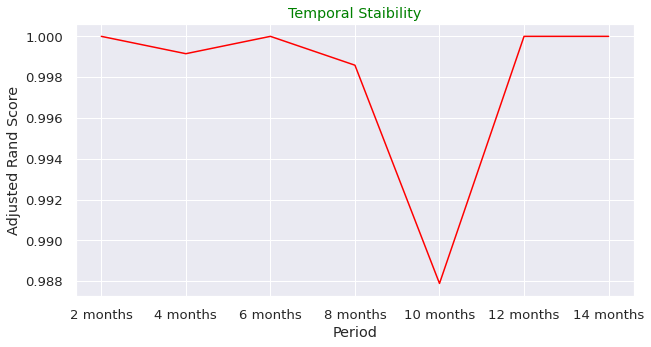

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(10, 5))
plt.plot(sil5['Period'], sil5['ARS'], c='red')

plt.xlabel('Period')
plt.ylabel('Adjusted Rand Score')
plt.title('Temporal Staibility', color='green')